<a href="https://colab.research.google.com/github/TobiasLaimer/ColabStuff/blob/master/colab_basics_playaround_easy_wp_rfreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Basics in python with NFL play by play data


In [4]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_folder = 'drive/My Drive/Code/NFL_pbp/'
data_file = os.listdir(data_folder)
fn = data_folder + data_file[0]

In [6]:
df = pd.read_csv(fn)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


In [8]:
df.columns.values

array(['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100',
       'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'posteam_timeouts_remaining',
       'defteam_timeouts_remaining', 'total_home_score',
       'total_away_score', 'posteam_score', 'defteam_score',
       'score_differential', 'posteam_score_post', 'defteam_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02daf40358>,
      dtype=object)

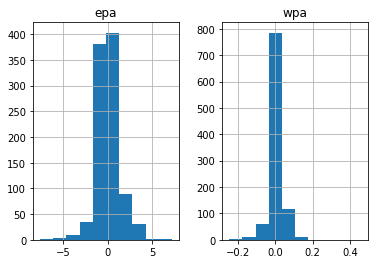

In [9]:
df[['wpa','epa']].sample(1000).hist()

In [80]:
df[['home_wp' , 'total_home_pass_epa' , 'total_home_rush_epa']].sample(1000).corr()**2

,home_wp,total_home_pass_epa,total_home_rush_epa
home_wp,1.000000,0.615609,0.166713
total_home_pass_epa,0.615609,1.000000,0.002799
total_home_rush_epa,0.166713,0.002799,1.000000


In [11]:
df['play_type'].value_counts()

pass           186677
run            132692
no_play         42431
kickoff         25552
punt            23914
extra_point     10934
field_goal       9777
qb_kneel         3830
qb_spike          690
Name: play_type, dtype: int64

In [12]:
df_pass = df.loc[(df['play_type']=='pass')&(df['posteam']=='SF')]
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5360 entries, 1723 to 448823
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 10.5+ MB


**note from bbaldwin**: "desc" is the column that gives full play description  

In [13]:
df_pass.loc[:,['yards_after_catch','air_yards' , 'air_wpa' , 'air_epa' , 'total_away_pass_epa' , 'total_home_pass_epa']].describe()

,yards_after_catch,air_yards,air_wpa,air_epa,total_away_pass_epa,total_home_pass_epa
count,2980.000000,4903.000000,4897.000000,4901.000000,5360.000000,5360.000000
mean,5.612752,8.050989,0.011744,0.445410,-1.744609,1.744609
std,7.675377,9.505643,0.048414,1.405260,10.859392,10.859392
min,-6.000000,-18.000000,-0.844614,-6.068747,-42.316600,-34.458300
25%,1.000000,2.000000,-0.014633,-0.581667,-8.407070,-4.597804
50%,3.000000,5.000000,-0.000673,-0.082635,-1.402682,1.402682
75%,8.000000,12.000000,0.034641,1.463532,4.597804,8.407070
max,70.000000,53.000000,0.811218,8.150204,34.458300,42.316600


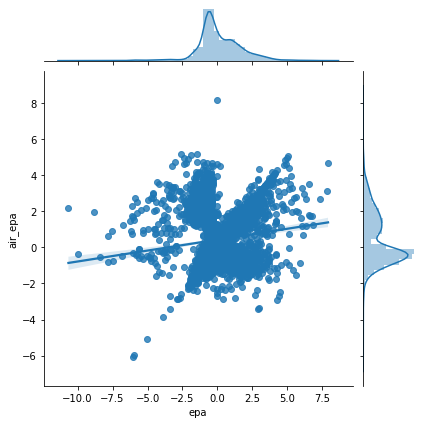

In [14]:
sns.jointplot('epa','air_epa',data=df_pass,kind='reg')

In [15]:
df_pass['defteam'].sort_values().unique()

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAC', 'JAX', 'KC', 'LA', 'LAC',
       'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SD',
       'SEA', 'STL', 'TB', 'TEN', 'WAS'], dtype=object)

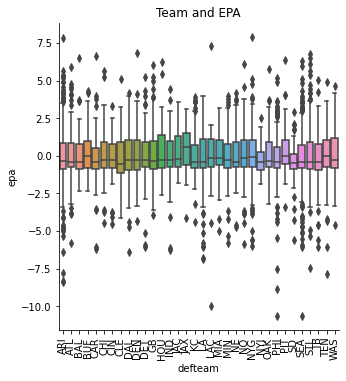

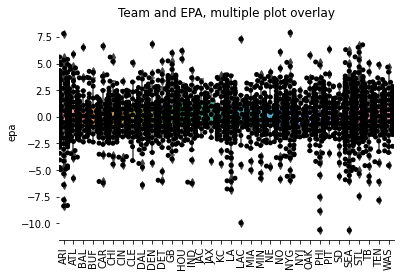

In [16]:
team_order = df_pass['defteam'].sort_values().unique()
sns.catplot(x='defteam',y='epa',data=df_pass,kind='box',order=team_order)
plt.xticks(rotation=90)
plt.title('Team and EPA')
plt.show()

team_order = df_pass['defteam'].sort_values().unique()
sns.boxplot(x='defteam',y='epa',data=df_pass,order=team_order)
sns.swarmplot(x='defteam',y='epa',data=df_pass,order=team_order,color='k')
sns.despine(left=True)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Team and EPA, multiple plot overlay')
plt.show()

# ML basics
* Regression stuff  
* How to save prediction values  
* Plot stuff with predict values  

In [17]:
model_data = df.loc[df['play_type'].isin(['pass','run'])]
model_data['is_pass'] = model_data['play_type'].replace(['pass','run'],[1,0])
model_data['score_diff'] = model_data['posteam_score'].sub(model_data['defteam_score'])

model_data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(319369, 257)

In [18]:
model_data.loc[:,['play_type','posteam_score','defteam_score','is_pass','score_diff']].sample(10)

,play_type,posteam_score,defteam_score,is_pass,score_diff
325810,run,20.0,17.0,0,3.0
33154,pass,7.0,0.0,1,7.0
58300,run,10.0,20.0,0,-10.0
389666,run,23.0,7.0,0,16.0
308352,run,0.0,7.0,0,-7.0
261187,run,17.0,14.0,0,3.0
418172,run,19.0,10.0,0,9.0
198857,run,0.0,0.0,0,0.0
400157,run,0.0,7.0,0,-7.0
16653,pass,0.0,0.0,1,0.0


In [72]:
#model_features = ['drive','qtr', 'down','yardline_100',
                  #'posteam_timeouts_remaining','defteam_timeouts_remaining',
                  #'score_diff' , 'game_seconds_remaining']
model_features = ['score_diff' , 'game_seconds_remaining']
target = 'wp'
model_features+[target]

['score_diff', 'game_seconds_remaining', 'wp']

In [73]:
test_data = model_data.dropna(subset=model_features+[target]).sample(frac=0.2)
train_data = model_data.loc[~model_data.index.isin(test_data.index.values)].dropna(subset=model_features+[target])
print(f"train data: {train_data.shape}\ntest data: {test_data.shape}")

train data: (255482, 257)
test data: (63871, 257)


r: 0.9299824321735264
p value: 0.0
r2: 0.8648673241513876
rmse: 0.10522357057185104


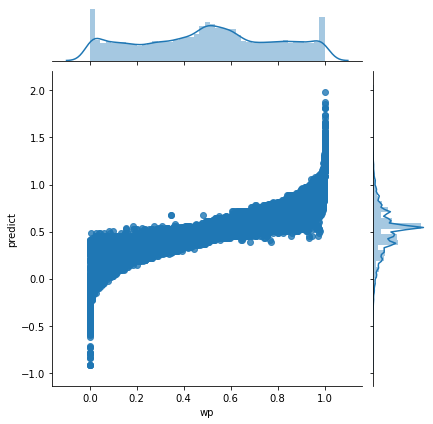

In [74]:
model = LinearRegression()
model.fit(train_data.loc[:,model_features],train_data[target])
# I set my index explicitly so I can join onto test_data without incurring missing data or dropped data
test_data['predict'] = pd.Series(model.predict(test_data.loc[:,model_features]),index=test_data.index)
r = pearsonr(test_data[target],test_data['predict'])
r2 = r[0]**2
rmse = mean_squared_error(test_data[target],test_data['predict'])**0.5
print(f"r: {r[0]}\np value: {r[1]}\nr2: {r2}\nrmse: {rmse}")
sns.jointplot(x=target,y='predict',data=test_data,kind='reg')

Be careful with indicies in pandas!! 

In [78]:
model = RandomForestRegressor(n_estimators=10)
model.fit(train_data.loc[:,model_features],train_data[target])
test_data['predict_rf'] = pd.Series(model.predict(test_data.loc[:,model_features]),index=test_data.index)

r = pearsonr(test_data[target],test_data['predict_rf'])
r2 = r[0]**2
rmse = mean_squared_error(test_data[target],test_data['predict_rf'])**0.5
print(f"r: {r[0]}\np value: {r[1]}\nr2: {r2}\nrmse: {rmse}")

r: 0.9772871584502788
p value: 0.0
r2: 0.9550901900718204
rmse: 0.06072511602782214


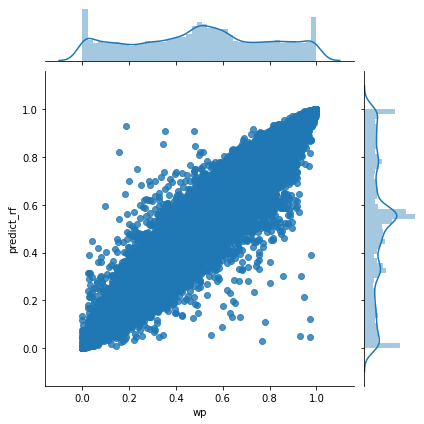

In [79]:
sns.jointplot(x=target,y='predict_rf',data=test_data,kind='reg')